<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[ADABoost](#ada)**
2. **[Gradient Boosting](#gb)**
3. **[Extreme Gradient Boosting (XGBoost)](#xgb)**

**Import the required libraries**

In [30]:
# type your code here
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
#pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import random
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold
# from xgboost import XGBClassifier

#### Load the csv file

In [31]:
# type your code here
df_employee=pd.read_csv('emp_attrition.csv')
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


**Data Preparation**

**Remove the outlier using IQR method, if present.**

In [32]:
# type your code here
Q1 = df_employee.quantile(0.25)
Q3 = df_employee.quantile(0.75)
IQR = Q3 - Q1
df_employee = df_employee[~((df_employee < (Q1 - 1.5 * IQR)) | (df_employee > (Q3 + 1.5 * IQR))).any(axis=1)]
df_employee = df_employee.reset_index(drop=True)

**Encode the categorical variables.**

In [33]:
# type your code here
df_target = df_employee['Attrition']
df_feature = df_employee.drop('Attrition', axis = 1)

In [34]:
for i in range(len(df_target)):
    if df_target[i] == 'Yes':
        df_target[i] = 1
    else:
        df_target[i] = 0
df_target = df_target.astype('int')

In [35]:
df_num = df_feature.select_dtypes(include = [np.number])
df_cat = df_feature.select_dtypes(include = [np.object])

dummy_var = pd.get_dummies(data = df_cat, drop_first = True)
X = pd.concat([df_num, dummy_var], axis = 1)


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Convert the Age variable into categorical by dividing it in the ranges; 18-30, 31-40, 41-50, 51-60.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
# for i in range (X.shape[0]):
#     if X.Age[i]>=18 and X.Age[i]<=30:
#         X.Age[i]='18-30'
#     elif X.Age[i]>30 and X.Age[i]<=40:
#         X.Age[i]='31-40'
#     elif X.Age[i]>40 and X.Age[i]<=50:
#         X.Age[i]='41-50'
#     else:
#         X.Age[i]='51-60'
# X.head()        

In [37]:
# type your code here
# iterating a for loop 
# categorizing the variable 'Age'
for i in range(X.shape[0]):
    if X.Age[i]>=18 and X.Age[i]<=30:
        X.Age[i] = "A18-30"
    elif(X.Age[i]>=31 and X.Age[i]<=40):
        X.Age[i] = "A31-40"
    elif(X.Age[i]>=41 and X.Age[i]<=50):
        X.Age[i] = "A41-50"
    else:
        X.Age[i] = "A51-60"
    
X.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,A31-40,3,1,3,1,1,3348,1,11,3,10,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,A31-40,4,4,1,3,4,10400,1,11,3,14,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,A31-40,9,4,3,1,1,2018,3,14,3,5,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,A41-50,7,2,4,2,2,2372,6,16,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,A41-50,27,3,3,3,1,10820,8,11,3,8,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [38]:
X.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'OverTime_Yes'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Employee from which age category has the highest salary?.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
X['MonthlyIncome'].groupby(by=X['Age']).max()

Age
A18-30    11935
A31-40    12061
A41-50    11957
A51-60    10976
Name: MonthlyIncome, dtype: int64

In [40]:

# group the dataframe by 'Age'
grp = X.groupby('Age')

# find out the maximum value from the column MonthlyIncome for each age group
grp.MonthlyIncome.max()


Age
A18-30    11935
A31-40    12061
A41-50    11957
A51-60    10976
Name: MonthlyIncome, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Dummy encode the categorical variable "Age".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
X = pd.get_dummies(data = X, drop_first = True)
X.head()




,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,Age_A31-40,Age_A41-50,Age_A51-60
0,3,1,3,1,1,3348,1,11,3,10,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,4,4,1,3,4,10400,1,11,3,14,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,9,4,3,1,1,2018,3,14,3,5,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,7,2,4,2,2,2372,6,16,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,27,3,3,3,1,10820,8,11,3,8,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [42]:
X.shape

(1487, 32)

<a id="ada"> </a>
## 1. ADABoost

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a adaboost model with 40 number of estimators to predict whether or not an employee will leave the company based on all the dummy encoded categorical features only. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
df_target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1487 entries, 0 to 1486
Series name: Attrition
Non-Null Count  Dtype
--------------  -----
1487 non-null   int32
dtypes: int32(1)
memory usage: 5.9 KB


In [51]:
X.iloc[:, 10:].head(1)


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,Age_A31-40,Age_A41-50,Age_A51-60
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0


In [54]:
 X.iloc[:, :10].head(1)

,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,3,1,3,1,1,3348,1,11,3,10


In [56]:
 X.iloc[:, 10].head(5)

0    1
1    0
2    0
3    0
4    1
Name: BusinessTravel_Travel_Frequently, dtype: uint8

In [58]:
 X.iloc[:, [10,11,12]].head(2)

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development
0,1,0,1
1,0,1,0


In [59]:
df_target.head(2)

0    1
1    1
Name: Attrition, dtype: int32

In [43]:
# type your code here
X_subset = X.iloc[:, 10:]
X_subset.head()
X_train, X_test, y_train, y_test = train_test_split(X_subset, df_target,random_state = 10, test_size = 0.2)


ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

ada_model.fit(X_train, y_train)

y_pred = ada_model.predict(X_test)

In [44]:
AB_be=[]
AB_ve=[]
for n in np.arange(1,100):
  AB=AdaBoostClassifier(n_estimators=n,random_state=10)
  kfold = KFold(shuffle=True,n_splits=10,random_state=0)
  scores=cross_val_score(AB,X,df_target,cv=kfold,scoring='roc_auc')
  AB_be.append(np.mean(1-scores))
  AB_ve.append(np.std(scores,ddof=1))
  


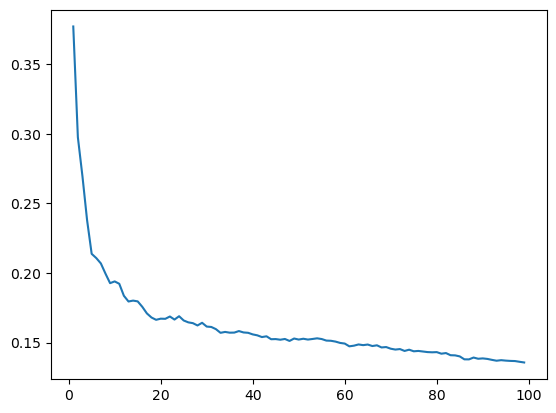

In [45]:
x_axis=np.arange(1,100)
plt.plot(x_axis,AB_be)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a adaboost full model with 40 number of estimators to predict if an employee will leave the company. Generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
# type your code here
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)
y_pred_full = ada_model.predict(X_test)
print(classification_report(y_test, y_pred_full))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       170
           1       0.74      0.78      0.76       128

    accuracy                           0.79       298
   macro avg       0.78      0.78      0.78       298
weighted avg       0.79      0.79      0.79       298



array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6.  Find the area under the receiver operating characteristic curve for full model built in question 5. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

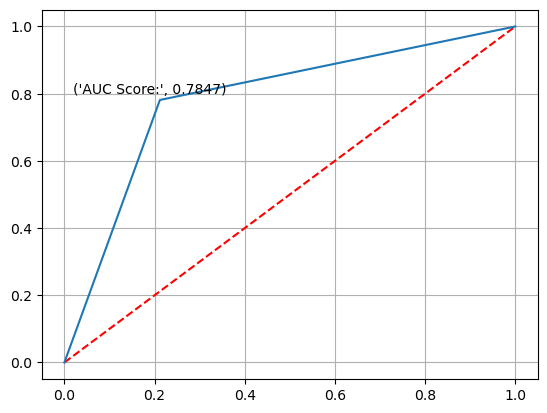

In [47]:
# type your code here
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_full)

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_full),4)))
                               
# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot a confusion matrix for the full model built above.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

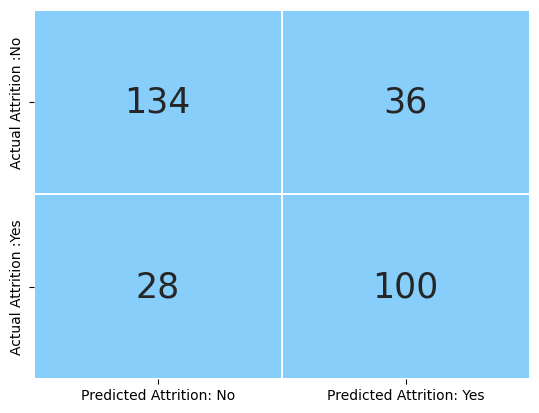

array([[134,  36],
       [ 28, 100]], dtype=int64)

In [48]:
# type your code here
cm = confusion_matrix(y_test, y_pred_full)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()
cm

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here
# True Negative from confusion matrix
TN = cm[0][0]
# True Positive from confusion matrix
TP = cm[1][1]
# False Positive from confusion matrix
FP = cm[0][1]
# False Negative from confusion matrix
FN = cm[1][0]

# add all the values of a confusion matrix
total = TN + TP + FP + FN

# find the percentage of correctly classified observations
# round the result upto 2 decimal points
correct_classified_percentage = ((TN+TP)/total)*100
print("Percentage of correctly classified observations: ", round(correct_classified_percentage, 2))

# find the percentage of  misclassified observations
# round the result upto 2 decimal points
misclassified_percentage = ((FP+FN)/total)*100
print("Percentage of misclassified observations: ", round(misclassified_percentage, 2))

# find the specificity
# round the result upto 4 decimal points
specificity = TN/(TN+FP)
print("\nSpecificity: ", round(specificity, 4))

# find the sensitivity
# round the result upto 4 decimal points
sensitivity = TP/(TP+FN)
print("Sensitivity: ", round(sensitivity, 4))


Percentage of correctly classified observations:  78.52
Percentage of misclassified observations:  21.48

Specificity:  0.7882
Sensitivity:  0.7812


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the best value of hyperparameters "n_estimators" and "learning_rate" for the adaboost full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

       n_estimators = [100, 120, 150, 200, 250, 300, 350],
       learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015]         

In [ ]:
# type your code here
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]
ada_model = AdaBoostClassifier(random_state = 10)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
ada_grid = GridSearchCV(estimator = ada_model, 
                         param_grid = tuned_paramaters, 
                         cv = kf,scoring='roc_auc',
                         n_jobs=-1)
ada_grid.fit(X_train, y_train)
print('Best parameters for AdaBoost Classifier: ', ada_grid.best_params_, '\n')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a adaboost model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<a id="gb"> </a>
## 2. Gradient Boosting

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Build the gradient boosting model 100 estimators and maximum depth 3. Also, find the accuracy score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# type your code here
gboost_model = GradientBoostingClassifier(n_estimators = 100, max_depth = 3, random_state = 8)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

y_pred_gb = gboost_model.predict(X_test)

print('The accuracy score is ', round(accuracy_score(y_test, y_pred_gb), 4))

The accuracy score is  0.8893


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>12. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150, 200, 250, 300, 350],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        max_depth = [2, 3, 4, 5, 6]

In [26]:
# type your code here
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'max_depth': [2, 3, 4, 5, 6]}]
gboost_model = GradientBoostingClassifier(random_state = 8)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
gb_grid = GridSearchCV(estimator = gboost_model, 
                         param_grid = tuned_paramaters, 
                         cv = kf, 
                         n_jobs=-1)
gb_grid.fit(X_train, y_train)
print('Best parameters for Gradient Boositng Classifier: ', gb_grid.best_params_, '\n')

Best parameters for Gradient Boositng Classifier:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 120} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>13. Build the gradient boosting model and an adaboost model with their best parameters and generate a classification report for both of them. Which model is the best and why?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
gboost_model = GradientBoostingClassifier(n_estimators = 120, 
                                          max_depth = 6, 
                                          learning_rate = .1,
                                          random_state = 8)
gboost_model.fit(X_train, y_train)

y_pred_gb = gboost_model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       170
           1       0.89      0.98      0.93       128

    accuracy                           0.94       298
   macro avg       0.93      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Plot the area under the receiver operating characteristic curve for tuned gradient boosting model built in question 13. Also plot a confusion matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Text(0.02, 0.8, "('AUC Score:', 0.9412)")

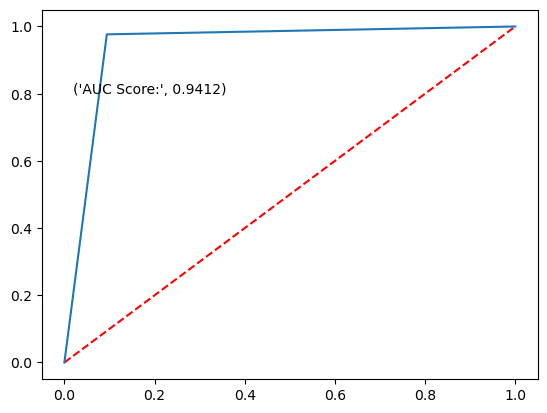

In [28]:
# type your code here
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr, tpr)
plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_gb),4)))
    

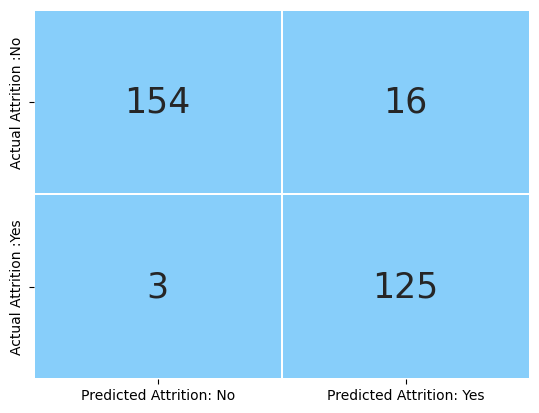

In [30]:
# plot the grid
plt.grid(True)

cm = confusion_matrix(y_test, y_pred_gb)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted Attrition: No','Predicted Attrition: Yes'], 
                           index = ['Actual Attrition :No','Actual Attrition :Yes'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 10)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 10)

# display the plot
plt.show()

<a id="xgb"> </a>
## 3. Extreme Gradient Boosting (XGBoost)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build the XGBoost model with a learning rate of 0.01 and gamma equal to 2. Calculate the roc_auc score and generate a classification rerport.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
!pip install xgboost

     -------------------------------------- 70.9/70.9 MB 988.6 kB/s eta 0:00:00


In [37]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(learning_rate = 0.01, gamma = 2)
xgb_model.fit(X_train, y_train)
                                                             
y_pred_xgb = xgb_model.predict(X_test)

score = roc_auc_score(y_test, y_pred_xgb)
print('The Roc_Auc Score is ', score)

print(classification_report(y_test, y_pred_xgb))



tuned_paramaters = [{'n_estimators':  [100, 120, 150],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2, 3, 4, 5, 6],
                     'max_depth': [2, 3, 4, 5, 6]}]
xgb_model = XGBClassifier(random_state = 8, n_jobs=-1)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
xgb_grid = GridSearchCV(estimator = xgb_model, 
                         param_grid = tuned_paramaters, 
                         cv = kf, 
                         n_jobs=-1)

xgb_grid.fit(X_train, y_train)

The Roc_Auc Score is  0.8267463235294119
              precision    recall  f1-score   support

           0       0.88      0.79      0.84       170
           1       0.76      0.86      0.81       128

    accuracy                           0.82       298
   macro avg       0.82      0.83      0.82       298
weighted avg       0.83      0.82      0.82       298



GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     inte...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=

In [31]:
# type your code here



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>16. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the extreme gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        gamma = [2, 3, 4, 5, 6],
        max_depth = [2, 3, 4, 5, 6]

In [38]:
# type your code here
tuned_paramaters = [{'n_estimators':  [100, 120, 150],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2, 3, 4, 5, 6],
                     'max_depth': [2, 3, 4, 5, 6]}]
xgb_model = XGBClassifier(random_state = 8, n_jobs=-1)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
xgb_grid = GridSearchCV(estimator = xgb_model, 
                         param_grid = tuned_paramaters, 
                         cv = kf, 
                         n_jobs=-1)

xgb_grid.fit(X_train, y_train)

y_pred_xgb = xgb_grid.predict(X_test)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>17. Plot the connfusion matrix for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>18. Plot the area under the receiver operating characteristic curve for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>19. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Adaboost model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>20. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Gradient Boosting model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here